In [1]:
import pandas as pd

In [2]:
titanic_df = pd.read_csv('https://raw.githubusercontent.com/rcpsilva/Python_For_Data_Science/main/2022-2/Python%20Notebooks/datasets/titanic.csv')
ports_df = pd.read_csv('https://raw.githubusercontent.com/rcpsilva/Python_For_Data_Science/main/2022-2/Python%20Notebooks/datasets/ports.csv')

In [3]:
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
ports_df.head()

,City,Country,GDP (in billions USD),Population,Area (in square kilometers),Latitude,Longitude,Main Language
0,S,United Kingdom,330.9,254275,51.81,50.9097,-1.4863,English
1,C,France,273.9,37489,489.00,49.6333,1.6167,French
2,Q,Ireland,131.1,19000,12.48,51.8503,-8.2943,Irish


In [5]:
merged_df = pd.merge(titanic_df, ports_df, left_on='Embarked', right_on='City')

In [6]:
merged_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,City,Country,GDP (in billions USD),Population,Area (in square kilometers),Latitude,Longitude,Main Language
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,S,United Kingdom,330.9,254275,51.81,50.9097,-1.4863,English
1,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,S,United Kingdom,330.9,254275,51.81,50.9097,-1.4863,English
2,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,S,United Kingdom,330.9,254275,51.81,50.9097,-1.4863,English
3,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,S,United Kingdom,330.9,254275,51.81,50.9097,-1.4863,English
4,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,S,United Kingdom,330.9,254275,51.81,50.9097,-1.4863,English


In [7]:
# Count the proportion of NaN values in each column
nan_proportion = merged_df.isna().mean()

# Print the proportion of NaN values in each column
print(nan_proportion)

PassengerId                    0.000000
Survived                       0.000000
Pclass                         0.000000
Name                           0.000000
Sex                            0.000000
Age                            0.199100
SibSp                          0.000000
Parch                          0.000000
Ticket                         0.000000
Fare                           0.000000
Cabin                          0.772778
Embarked                       0.000000
City                           0.000000
Country                        0.000000
GDP (in billions USD)          0.000000
Population                     0.000000
Area (in square kilometers)    0.000000
Latitude                       0.000000
Longitude                      0.000000
Main Language                  0.000000
dtype: float64


In [8]:
merged_df = merged_df.drop('Cabin', axis=1)
merged_df = merged_df.drop('Main Language', axis=1)
merged_df = merged_df.drop('PassengerId', axis=1)

In [9]:
# Replace NaNs in 'Age' column with the median value
median_age = merged_df['Age'].median()
merged_df['Age'] = merged_df['Age'].fillna(median_age)

In [10]:
nan_proportion = merged_df.isna().mean()
# Print the proportion of NaN values in each column
print(nan_proportion)

Survived                       0.0
Pclass                         0.0
Name                           0.0
Sex                            0.0
Age                            0.0
SibSp                          0.0
Parch                          0.0
Ticket                         0.0
Fare                           0.0
Embarked                       0.0
City                           0.0
Country                        0.0
GDP (in billions USD)          0.0
Population                     0.0
Area (in square kilometers)    0.0
Latitude                       0.0
Longitude                      0.0
dtype: float64


## Encoders

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

In [13]:
# Encode non-numerical values using get_dummies
onehot_df = pd.get_dummies(merged_df)
print(onehot_df.shape)
onehot_df

(889, 1591)


,Survived,Pclass,Age,SibSp,Parch,Fare,GDP (in billions USD),Population,Area (in square kilometers),Latitude,...,Ticket_WE/P 5735,Embarked_C,Embarked_Q,Embarked_S,City_C,City_Q,City_S,Country_France,Country_Ireland,Country_United Kingdom
0,0,3,22.0,1,0,7.2500,330.9,254275,51.81,50.9097,...,False,False,False,True,False,False,True,False,False,True
1,1,3,26.0,0,0,7.9250,330.9,254275,51.81,50.9097,...,False,False,False,True,False,False,True,False,False,True
2,1,1,35.0,1,0,53.1000,330.9,254275,51.81,50.9097,...,False,False,False,True,False,False,True,False,False,True
3,0,3,35.0,0,0,8.0500,330.9,254275,51.81,50.9097,...,False,False,False,True,False,False,True,False,False,True
4,0,1,54.0,0,0,51.8625,330.9,254275,51.81,50.9097,...,False,False,False,True,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,3,28.0,0,0,7.7500,131.1,19000,12.48,51.8503,...,False,False,True,False,False,True,False,False,True,False
885,0,3,28.0,0,0,6.9500,131.1,19000,12.48,51.8503,...,False,False,True,False,False,True,False,False,True,False
886,1,3,28.0,0,0,7.7500,131.1,19000,12.48,51.8503,...,False,False,True,False,False,True,False,False,True,False
887,0,3,39.0,0,5,29.1250,131.1,19000,12.48,51.8503,...,False,False,True,False,False,True,False,False,True,False


In [14]:
# Iterate over each column
for column in merged_df.columns:
    # Check if the column has non-numerical values
    if merged_df[column].dtype == 'object':
        # Encode non-numerical values using LabelEncoder
        merged_df[column] = label_encoder.fit_transform(merged_df[column].astype(str))

# Print the updated DataFrame
merged_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,City,Country,GDP (in billions USD),Population,Area (in square kilometers),Latitude,Longitude
0,0,3,108,1,22.0,1,0,522,7.2500,2,2,2,330.9,254275,51.81,50.9097,-1.4863
1,1,3,353,0,26.0,0,0,668,7.9250,2,2,2,330.9,254275,51.81,50.9097,-1.4863
2,1,1,272,0,35.0,1,0,48,53.1000,2,2,2,330.9,254275,51.81,50.9097,-1.4863
3,0,3,15,1,35.0,0,0,471,8.0500,2,2,2,330.9,254275,51.81,50.9097,-1.4863
4,0,1,514,1,54.0,0,0,84,51.8625,2,2,2,330.9,254275,51.81,50.9097,-1.4863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,3,428,1,28.0,0,0,65,7.7500,1,1,1,131.1,19000,12.48,51.8503,-8.2943
885,0,3,250,1,28.0,0,0,447,6.9500,1,1,1,131.1,19000,12.48,51.8503,-8.2943
886,1,3,515,1,28.0,0,0,441,7.7500,1,1,1,131.1,19000,12.48,51.8503,-8.2943
887,0,3,683,0,39.0,0,5,479,29.1250,1,1,1,131.1,19000,12.48,51.8503,-8.2943


In [15]:
merged_df = merged_df.drop(['Latitude','Longitude','Embarked','Name'], axis=1)
merged_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,City,Country,GDP (in billions USD),Population,Area (in square kilometers)
0,0,3,1,22.0,1,0,522,7.2500,2,2,330.9,254275,51.81
1,1,3,0,26.0,0,0,668,7.9250,2,2,330.9,254275,51.81
2,1,1,0,35.0,1,0,48,53.1000,2,2,330.9,254275,51.81
3,0,3,1,35.0,0,0,471,8.0500,2,2,330.9,254275,51.81
4,0,1,1,54.0,0,0,84,51.8625,2,2,330.9,254275,51.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,3,1,28.0,0,0,65,7.7500,1,1,131.1,19000,12.48
885,0,3,1,28.0,0,0,447,6.9500,1,1,131.1,19000,12.48
886,1,3,1,28.0,0,0,441,7.7500,1,1,131.1,19000,12.48
887,0,3,0,39.0,0,5,479,29.1250,1,1,131.1,19000,12.48


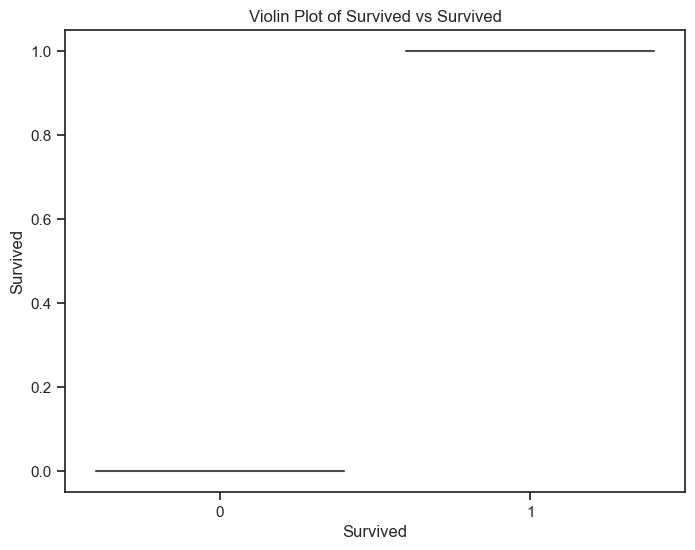

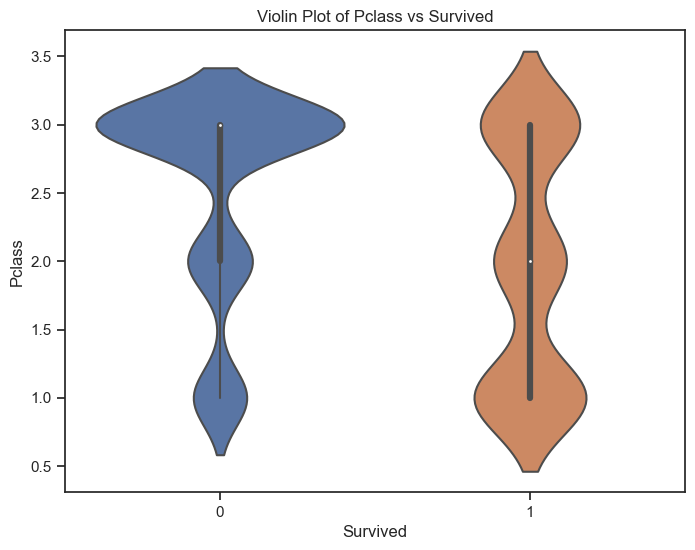

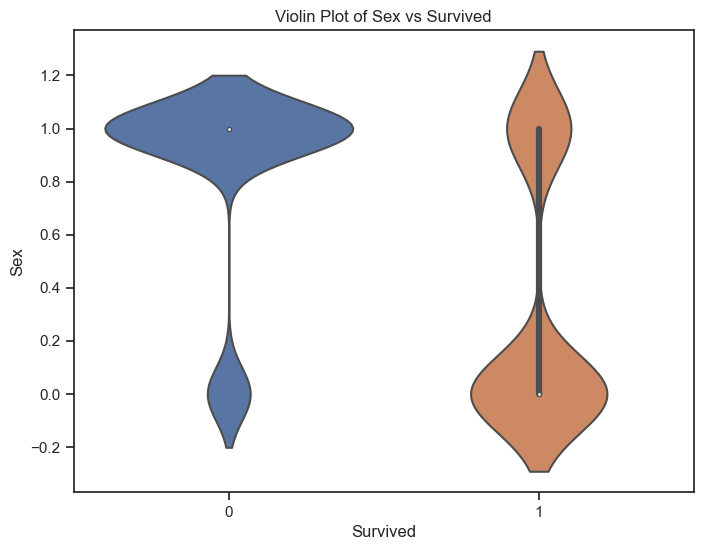

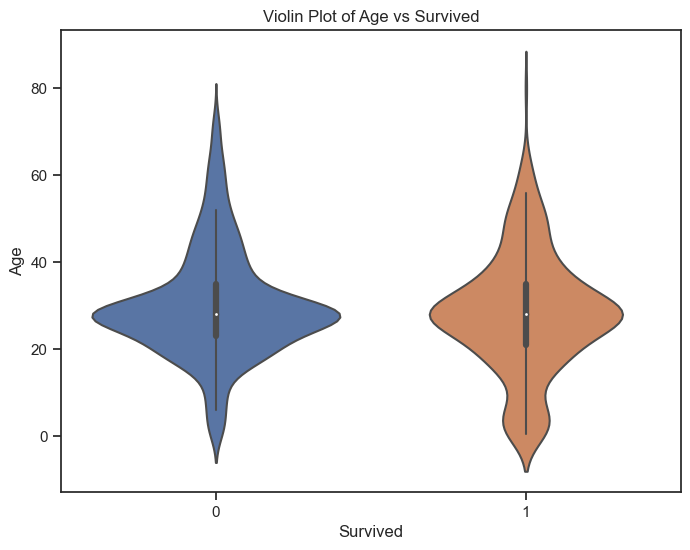

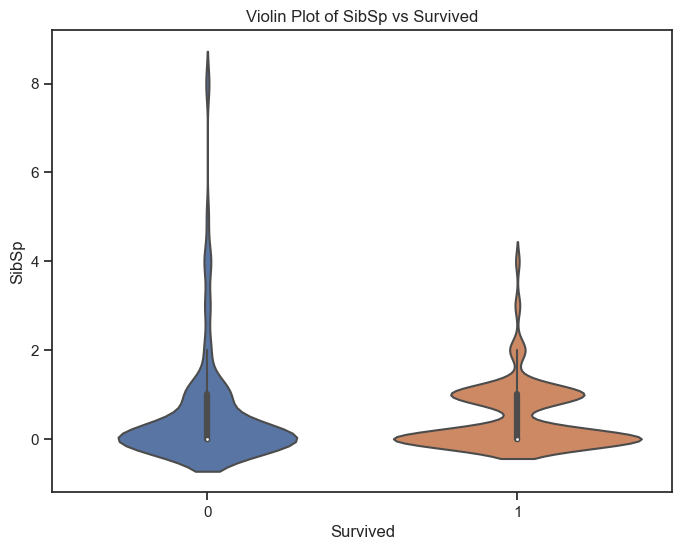

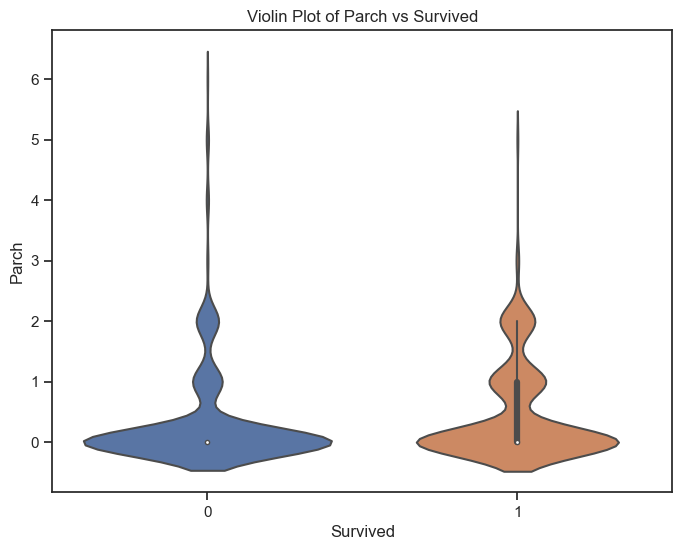

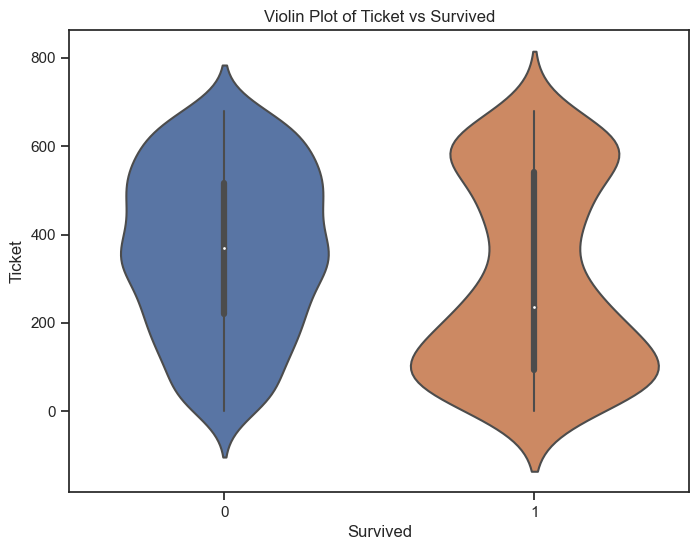

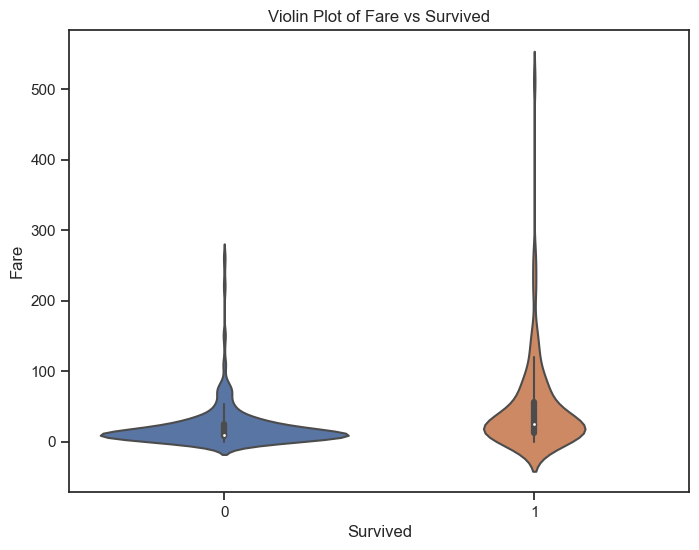

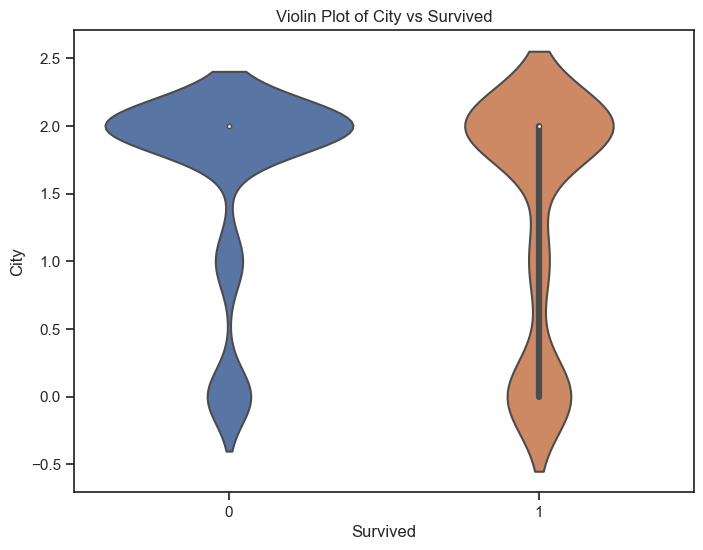

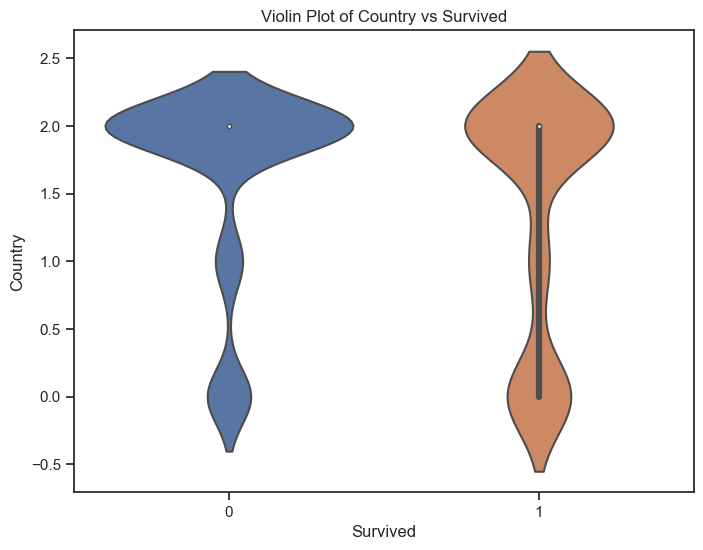

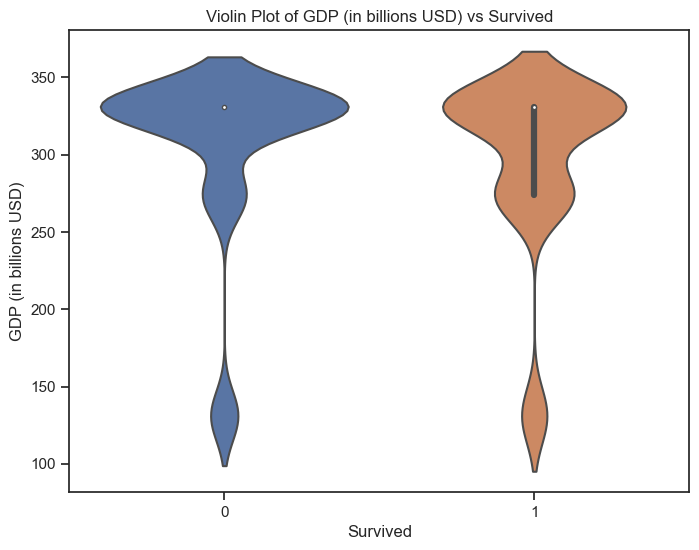

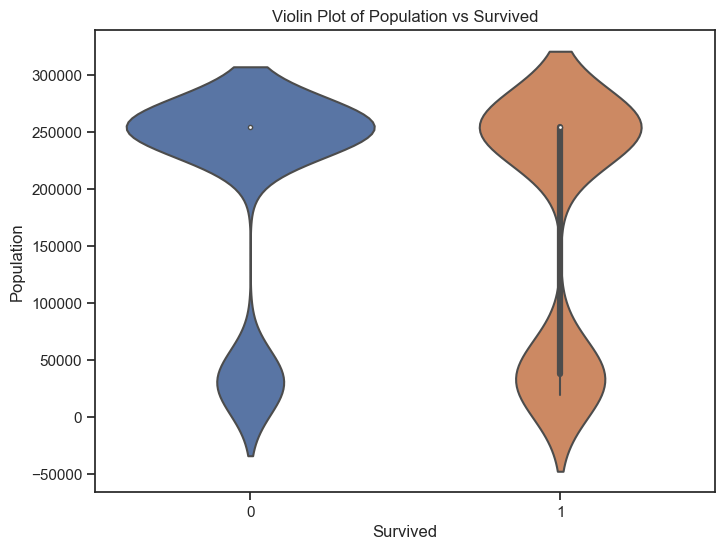

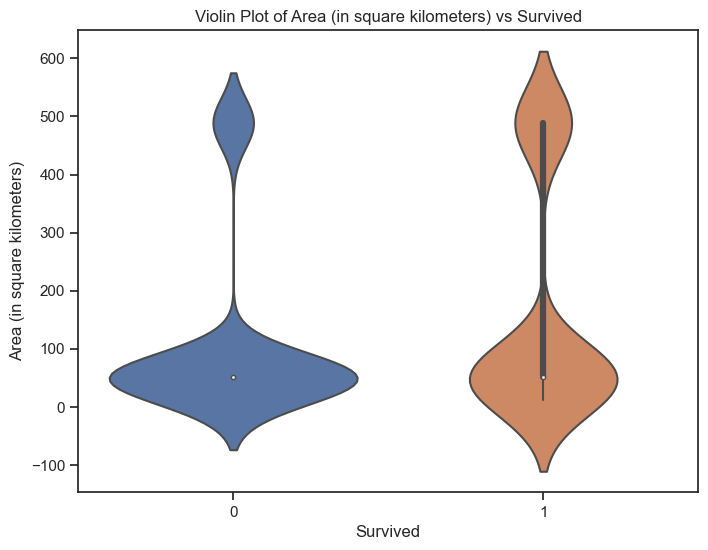

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the merged_df DataFrame from the previous code
# Create a list of attribute column names to iterate over
attribute_columns = merged_df.columns

# Create violin plots for each attribute
for column in attribute_columns:
    plt.figure(figsize=(8, 6))
    sns.violinplot(x='Survived', y=column, data=merged_df)
    plt.title(f'Violin Plot of {column} vs Survived')
    plt.xlabel('Survived')
    plt.ylabel(column)
    plt.show()


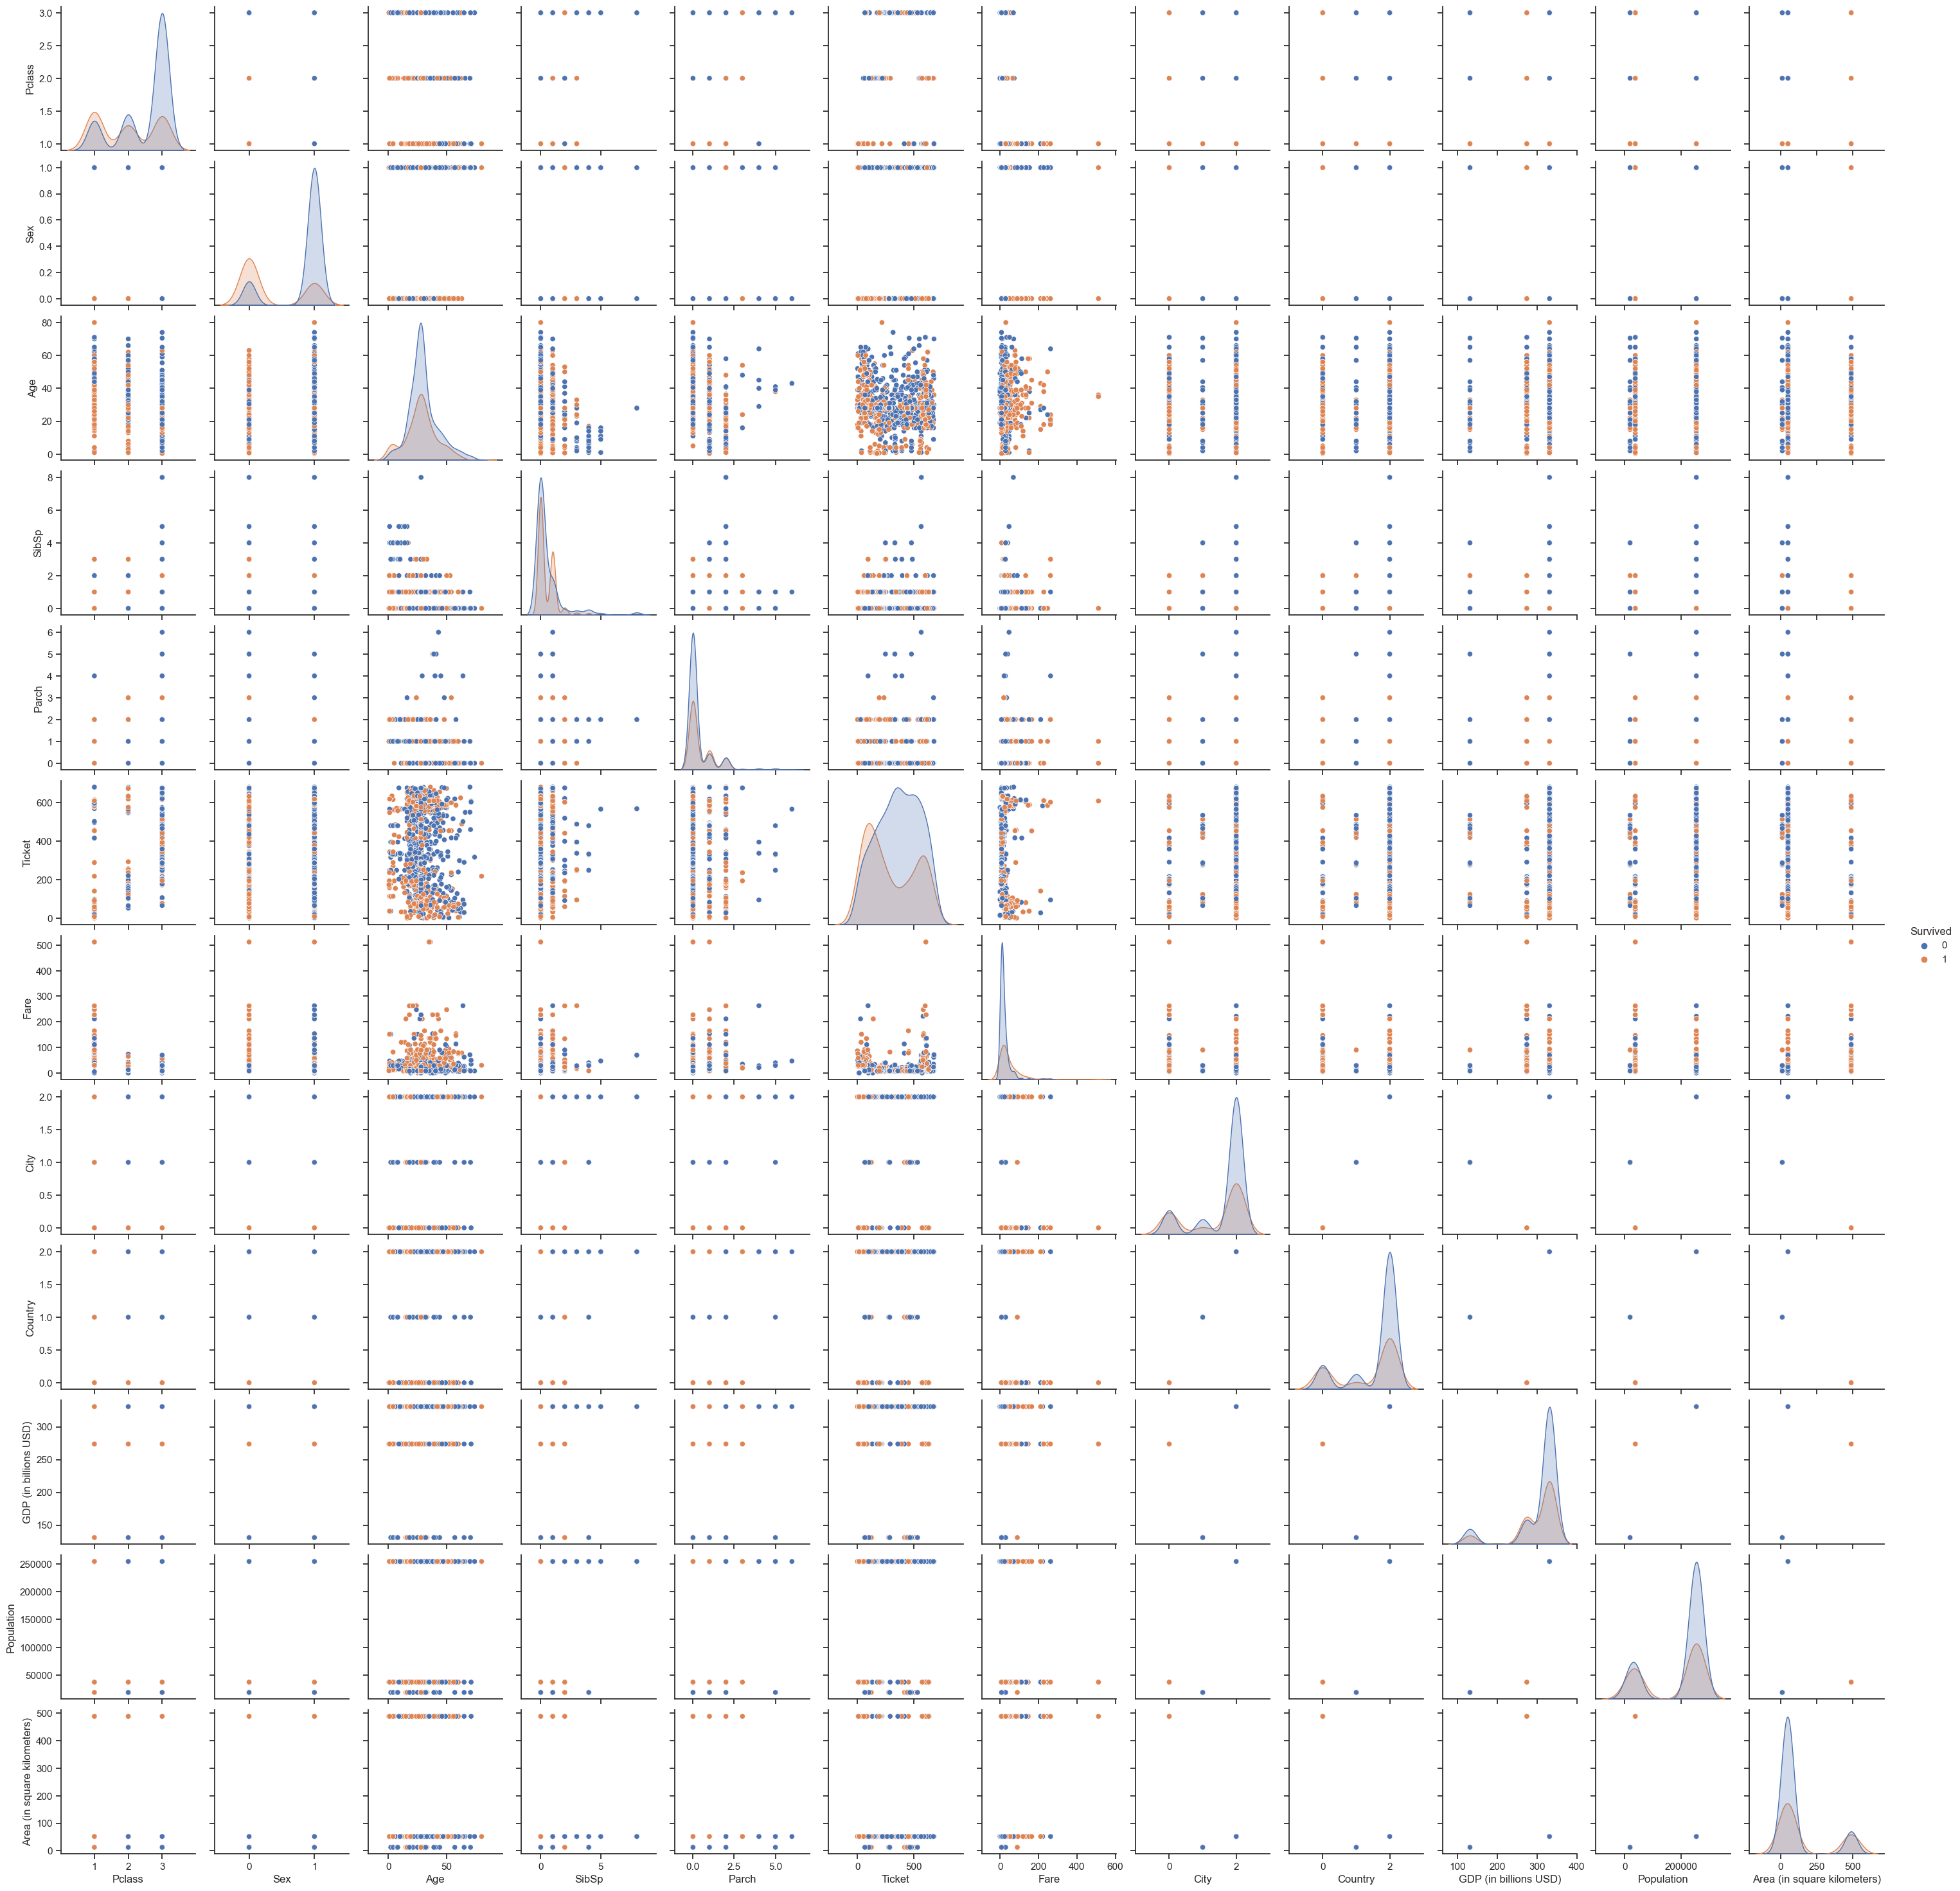

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the merged_df DataFrame from the previous code

# Set the 'Survived' column as the hue to highlight the classes
#sns.set(style='ticks')
#sns.pairplot(merged_df, hue='Survived')

In [17]:
merged_df.col

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'City', 'Country', 'GDP (in billions USD)', 'Population',
       'Area (in square kilometers)'],
      dtype='object')

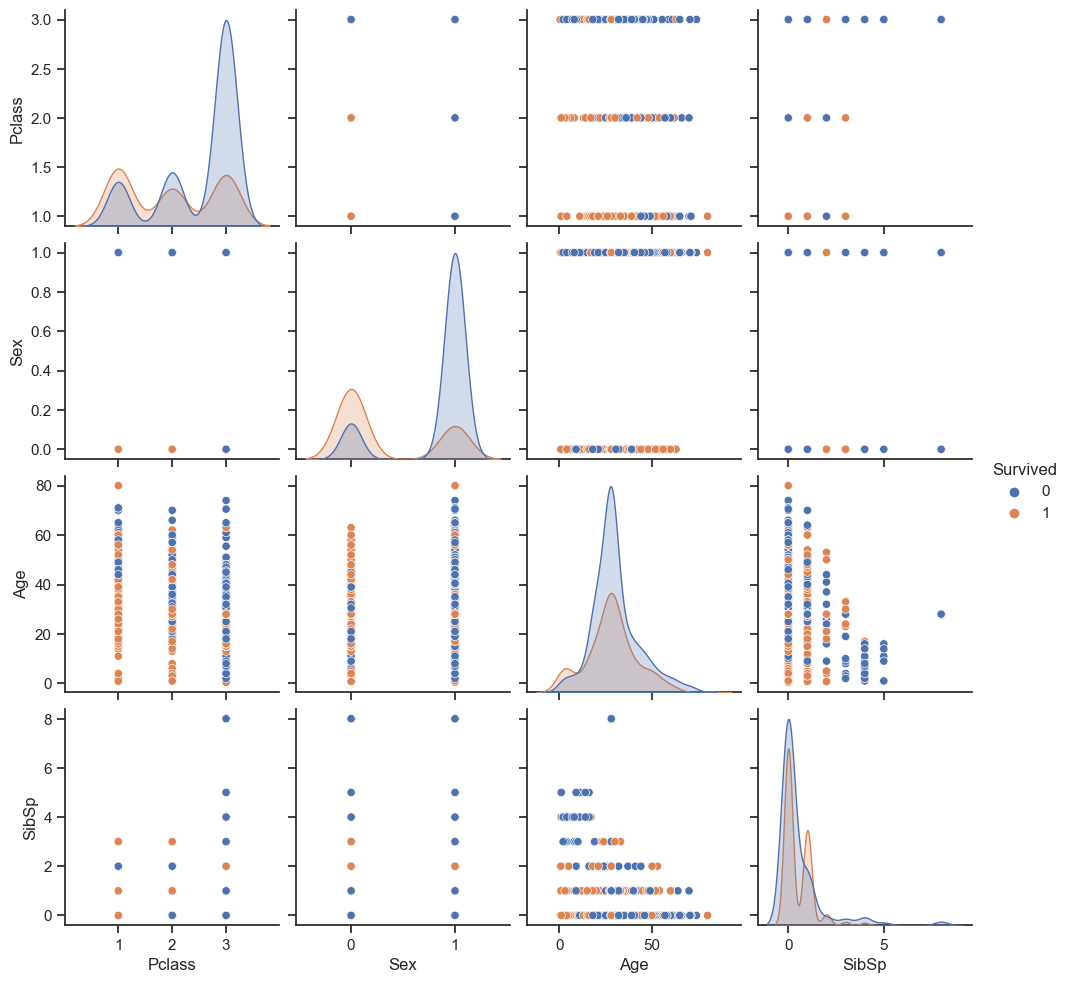

In [18]:
# Select the columns for scatterplots
columns_to_plot = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp']

# Set the 'Survived' column as the hue to highlight the classes
sns.set(style='ticks')
sns.pairplot(merged_df[columns_to_plot], hue='Survived')
plt.show()

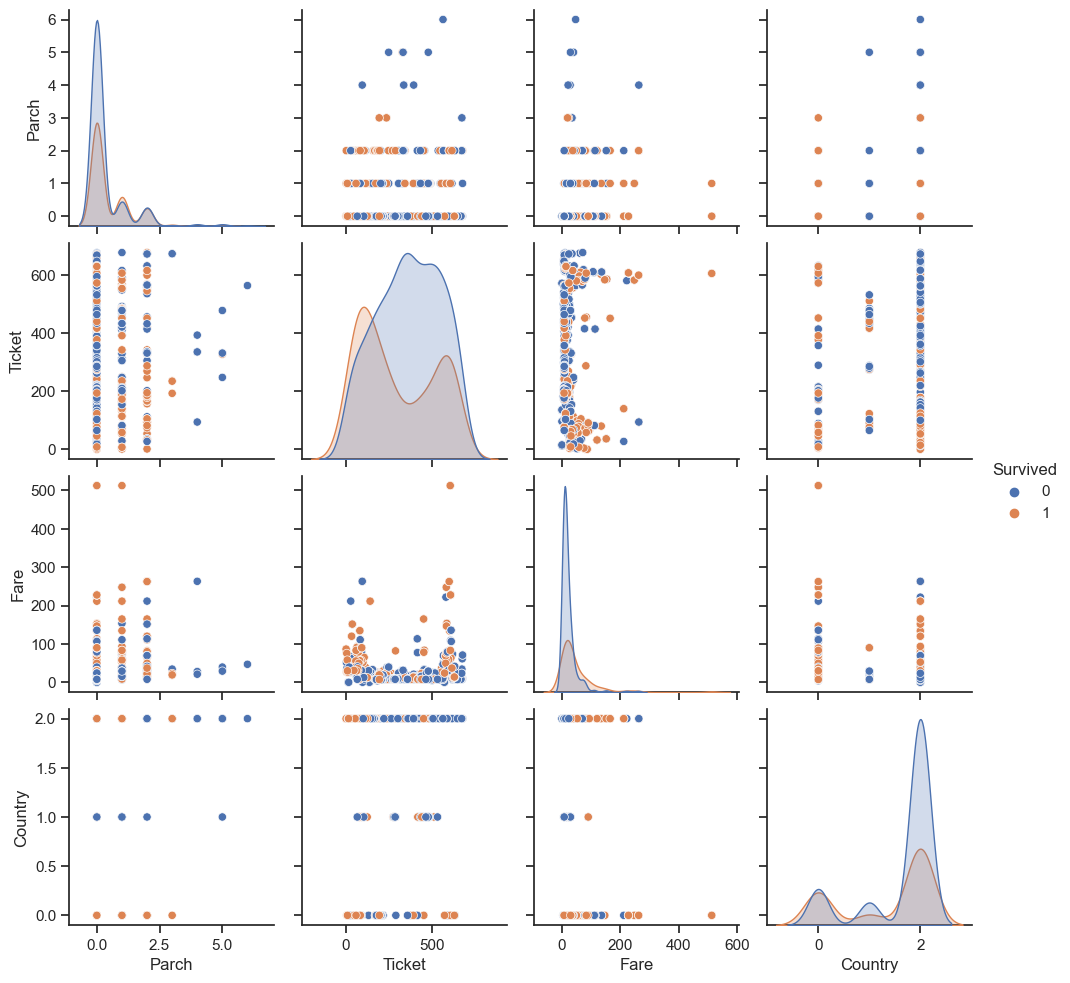

In [19]:
# Select the columns for scatterplots
columns_to_plot = ['Survived','Parch', 'Ticket', 'Fare','Country']

# Set the 'Survived' column as the hue to highlight the classes
sns.set(style='ticks')
sns.pairplot(merged_df[columns_to_plot], hue='Survived')
plt.show()

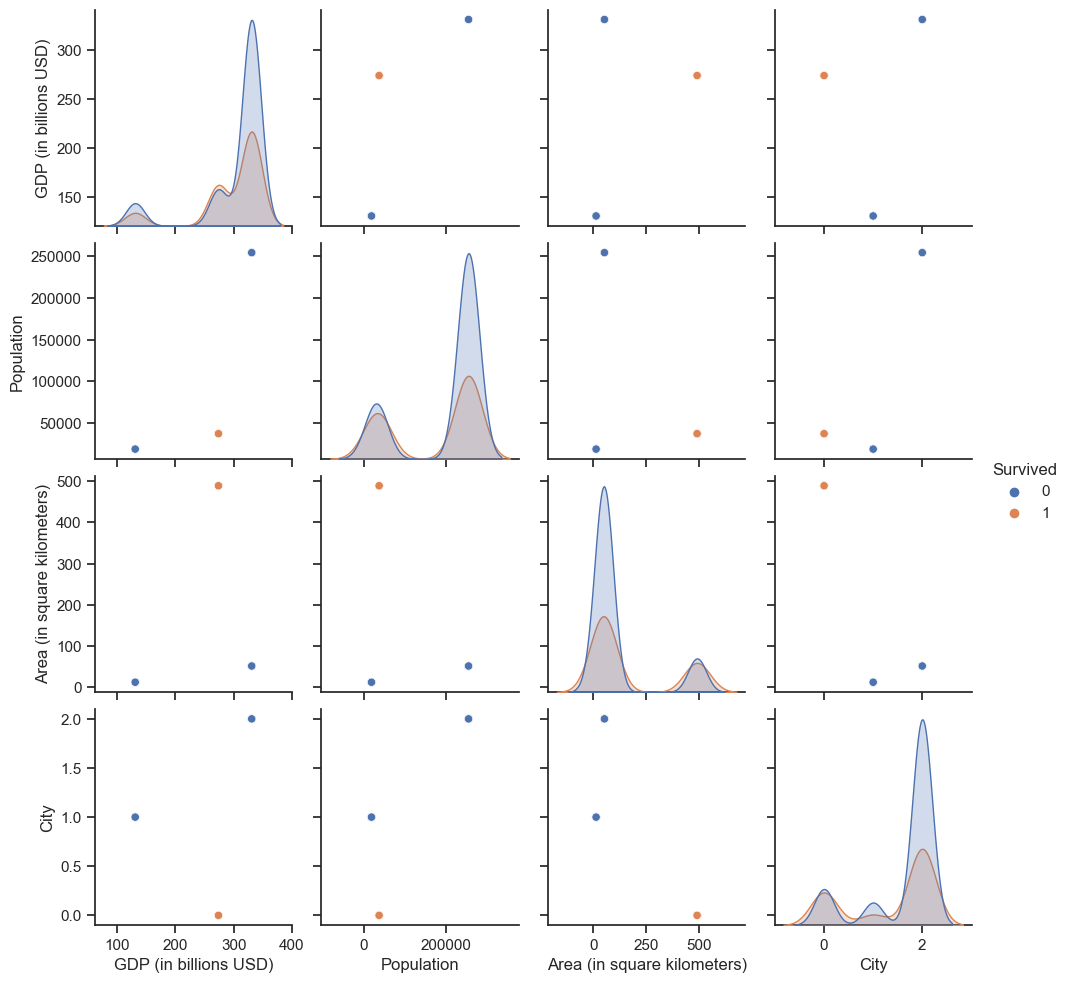

In [20]:
# Select the columns for scatterplots
columns_to_plot = ['Survived','GDP (in billions USD)', 'Population', 'Area (in square kilometers)','City']

# Set the 'Survived' column as the hue to highlight the classes
sns.set(style='ticks')
sns.pairplot(merged_df[columns_to_plot], hue='Survived')
plt.show()

In [28]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

# Assuming you have the merged_df DataFrame from the previous code
# Split the data into features (X) and target (y)
X = merged_df.drop('Survived', axis=1)
y = merged_df['Survived']

# Initialize the classifiers
classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    SVC(),
    KNeighborsClassifier()
]

# Perform cross-validation and collect F1-scores
results = []
for classifier in classifiers:
    cross_val_scores = cross_val_score(classifier, X, y, cv=5, scoring='f1_macro')
    for s in cross_val_scores:
        results.append([classifier,s])

import numpy as np
results = np.array(results)
# Create a DataFrame for plotting
#classifier_names = [
#    'Logistic Regression',
#    'Decision Tree',
#    'Random Forest',
#    'Gradient Boosting',
#    'Support Vector Machines',
#    'K-Nearest Neighbors'
#]
#df = pd.DataFrame({'Classifier': classifier_names, 'F1-scores': results})
df = pd.DataFrame({'Classifier':results[:,0], 'F1-scores':results[:,1]})


In [29]:
df

,Classifier,F1-scores
0,LogisticRegression(),0.505619
1,LogisticRegression(),0.583626
2,LogisticRegression(),0.574995
3,LogisticRegression(),0.657195
4,LogisticRegression(),0.479412
5,DecisionTreeClassifier(),0.688088
6,DecisionTreeClassifier(),0.776556
7,DecisionTreeClassifier(),0.756031
8,DecisionTreeClassifier(),0.813417
9,DecisionTreeClassifier(),0.651666


In [41]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Assuming you have your dataset and corresponding target variable
X = merged_df.drop('Survived', axis=1)
y = merged_df['Survived']

# Initialize the classifiers
classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC(),
    KNeighborsClassifier()
]

# Perform cross-validation and collect the F1-scores
results = []
for classifier in classifiers:
    scores = cross_val_score(classifier, X, y, cv=5, scoring='f1')
    results.append(scores)

# Create a DataFrame from the cross-validation results
classifier_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN']
results_df = pd.DataFrame({'Classifier': classifier_names, 'F1-scores': results})


In [44]:
results_df

,Classifier,F1-scores
0,Logistic Regression,"[0.25287356321839083, 0.37777777777777777, 0.3..."
1,Decision Tree,"[0.5999999999999999, 0.7067669172932332, 0.697..."
2,Random Forest,"[0.6306306306306305, 0.7258064516129031, 0.764..."
3,SVM,"[0.0, 0.0, 0.0, 0.0, 0.5551020408163265]"
4,KNN,"[0.43564356435643564, 0.4786324786324786, 0.60..."


In [45]:
results['F1-scores'] = pd.to_numeric(results['F1-scores'])
results['Classifier'] = results['Classifier'].astype(str)

# Create a list of classifier names
classifier_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN']

# Create violin plots for each classifier
plt.figure(figsize=(10, 6))
sns.violinplot(x='Classifier', y='F1-scores', data=results_df, order=classifier_names)
plt.title('Cross-Validation F1-scores for Different Classifiers')
plt.xlabel('Classifier')
plt.ylabel('F1-scores')
plt.show()

TypeError: list indices must be integers or slices, not str